In [2]:
import numpy as np

In [3]:
def N_steps(fi, ff, f_fid, Q_fid, F=10):
    f = fi
    N = 0
    while f < ff:
        Q = Q_fid * (f_fid/f)**2
        step_size = f / (F * Q)
        f += step_size
        N += 1
    return N

def N_steps_naive(fi, ff, f_fid, Q_fid, F=10):
    f = fi
    N = 0
    while f < ff:
        Q = Q_fid
        step_size = fi / (F * Q)
        f += step_size
        N += 1
    return N

In [4]:
EFR_steps_thresh = N_steps(2e9,4e9,4e9,54e3)

In [5]:
N_steps_naive(2e9,4e9,4e9,54e3)

540000

In [6]:
thresh_step_time = 5 # s

In [7]:
EFR_downtime_thresh = EFR_steps_thresh * thresh_step_time

In [8]:
days_per_s = 1.15741e-5

In [9]:
EFR_downtime_thresh * days_per_s

46.875220741

In [10]:
EFR_steps_obj = N_steps(2e9,4e9,4e9,120e3)
obj_step_time = 2 # s
EFR_downtime_obj = EFR_steps_obj * obj_step_time

In [11]:
EFR_downtime_obj * days_per_s

41.6668062964

# Again, with Stefan's Q

In [12]:
data = np.load('2024-01-18-EFR-QualityFactors.npz')

In [13]:
def N_steps_fed_Q(fi, ff, fs, Qs, F=10):
    f = fi
    N = 0
    while f < ff:
        Q = Qs[np.argmin(np.abs(fs-f))]
        step_size = f / (F * Q)
        f += step_size
        N += 1
    return N

In [14]:
EFR_steps_thresh = N_steps_fed_Q(data["frequency"][0],data["frequency"][-1],data["frequency"],1000*data["Qthr"])
thresh_step_time = 5 # s 
EFR_downtime_thresh = EFR_steps_thresh * thresh_step_time * days_per_s

In [15]:
EFR_steps_obj = N_steps_fed_Q(data["frequency"][0],data["frequency"][-1],data["frequency"],1000*data["Qobj"])
obj_step_time = 2 # s 
EFR_downtime_obj = EFR_steps_obj * obj_step_time * days_per_s

In [16]:
EFR_downtime_thresh, EFR_downtime_obj

(30.306086404, 24.244845975)

In [17]:
import matplotlib.pyplot as plt

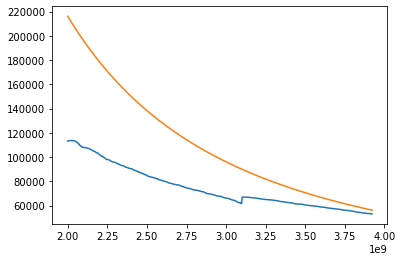

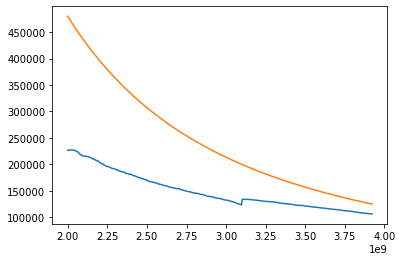

In [18]:
plt.plot(data["frequency"], 1000*data["Qthr"])
plt.plot(data["frequency"], 54e3 * (4e9/data["frequency"])**2)
plt.figure()
plt.plot(data["frequency"], 1000*data["Qobj"])
plt.plot(data["frequency"], 120e3 * (4e9/data["frequency"])**2)

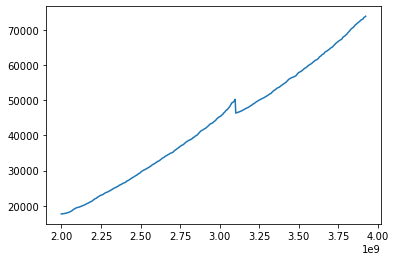

In [39]:
plt.plot(data["frequency"], data["frequency"]/(1000*data["Qthr"]))

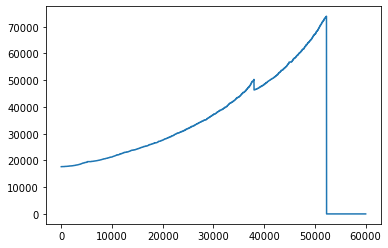

In [46]:
linewidths = data["frequency"]/(1000*data["Qthr"]) # Hz
fullspan_lw = -1 * np.ones(60000)
f = 2e9
i = 0
j = 0
while f < 4e9:
    fullspan_lw[i] = linewidths[j]
    f += linewidths[j]
    while j < len(data["frequency"]) and f > data["frequency"][j]:
        j += 1
    if j == len(data["frequency"]):
        break
    i += 1

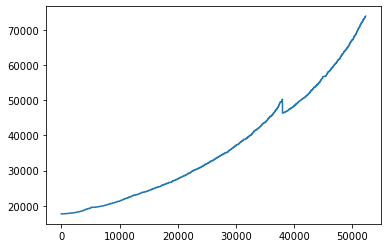

In [50]:
fullspan_lw = np.array(fullspan_lw)[np.where(fullspan_lw>0)]
plt.plot(fullspan_lw)

(-500.0, 500.0)

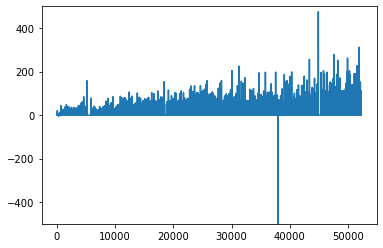

In [56]:
plt.plot(np.diff(fullspan_lw))
plt.ylim(-500,500)

In [47]:
f

3921820617.498297

In [58]:
EFR_steps_thresh/10, len(fullspan_lw)

(52368.8, 52275)

0.11761603670107681

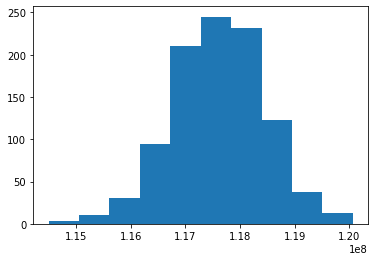

In [59]:
N_cands = 3200
reBWs = np.zeros(1000)
for i in range(len(reBWs)):
    reBWs[i] = np.sum(np.random.choice(fullspan_lw, N_cands, replace=False))
               
plt.hist(reBWs)
np.mean(reBWs*1e-9)

In [60]:
lw = 3e9 / 66000
lw * 3200 * 1e-9

0.14545454545454548